In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Load your data directory

df = pd.read_csv('/Users/sherifflawal/Downloads/NetworkRailProject.csv')

In [12]:
# Print out first Top 5

df.head()

,Time Period,National Great Britain,National England and Wales,National Scotland,Sector London and South East,Sector Long Distance,Sector Regional and Scotland,Franchised Avanti West Coast,Franchised c2c,Franchised Caledonian Sleeper,...,Franchised ScotRail,Franchised South Western Railway,Franchised Southeastern,Franchised TfW Rail,Franchised TransPennine Express,Franchised West Midlands Trains,Non-Franchised Grand Central,Non-Franchised Heathrow Express,Non-Franchised Hull Trains,Non-Franchised Lumo
0,Apr 2019 to Mar 2020 (Period 01),91.00,91.13,89.90,91.83,88.78,90.20,86.81,97.21,88.13,...,89.90,88.75,93.30,92.29,87.99,89.71,87.45,94.27,87.25,NaN
1,Apr 2019 to Mar 2020 (Period 02),90.41,90.41,90.43,90.86,88.62,90.09,85.89,96.10,77.30,...,90.46,86.87,92.51,93.52,85.39,87.44,85.89,96.44,82.54,NaN
2,Apr 2019 to Mar 2020 (Period 03),89.24,89.17,89.84,90.12,84.40,88.85,78.80,96.46,79.88,...,89.87,86.57,92.51,91.91,83.36,81.60,74.90,94.38,75.37,NaN
3,Apr 2019 to Mar 2020 (Period 04),87.72,87.38,90.75,87.90,84.53,88.06,83.10,95.55,88.69,...,90.75,79.90,92.19,88.57,85.50,81.62,77.07,93.71,74.86,NaN
4,Apr 2019 to Mar 2020 (Period 05),84.60,84.21,88.02,86.04,76.09,84.05,67.97,93.49,73.96,...,88.06,81.80,89.70,86.56,70.92,75.90,67.84,92.94,70.39,NaN


In [13]:
# Cleaning data

# checking for empty rows
df.isnull().sum()

# drop empty rows
df = df.dropna()

# drop duplicates
df = df.drop_duplicates()

In [14]:
df.isnull().sum()

Time Period                                0
National Great Britain                     0
National England and Wales                 0
National Scotland                          0
Sector London and South East               0
Sector Long Distance                       0
Sector Regional and Scotland               0
Franchised Avanti West Coast               0
Franchised c2c                             0
Franchised Caledonian Sleeper              0
Franchised Chiltern Railways               0
Franchised CrossCountry                    0
Franchised East Midlands Railway           0
Franchised Elizabeth line                  0
Franchised Govia Thameslink Railway        0
Franchised Great Western Railway           0
Franchised Greater Anglia                  0
Franchised London North Eastern Railway    0
Franchised London OvergCAST(round          0
Franchised Merseyrail                      0
Franchised Northern Trains                 0
Franchised ScotRail                        0
Franchised

In [64]:
print(df.describe())

       National Great Britain  National England and Wales  National Scotland  \
count               46.000000                   46.000000          46.000000   
mean                85.980000                   85.645652          89.133913   
std                  3.135523                    3.211496           3.413469   
min                 77.360000                   76.500000          78.910000   
25%                 84.542500                   84.050000          86.845000   
50%                 86.505000                   86.350000          90.410000   
75%                 88.260000                   87.925000          91.757500   
max                 91.280000                   91.380000          93.250000   

       Sector London and South East  Sector Long Distance  \
count                     46.000000             46.000000   
mean                      87.583696             79.142609   
std                        2.828273              5.492404   
min                       79.040000

In [16]:
target = 'National Great Britain'

In [17]:
predictors = df.columns.drop([target, 'Time Period'])

In [18]:
df = pd.get_dummies(df, columns=['Time Period'] + [col for col in predictors if df[col].dtype == 'object'], drop_first=True)

In [19]:
X = df.drop(columns=[target])
y = df[target]

In [20]:
# Add constant for intercept (statsmodels)

X_const = sm.add_constant(X)

In [37]:
print(X_const.dtypes)

const                                           float64
National England and Wales                      float64
National Scotland                               float64
Sector London and South East                    float64
Sector Long Distance                            float64
                                                 ...   
Time Period_Apr 2024 to Mar 2025 (Period 10)      int64
Time Period_Apr 2024 to Mar 2025 (Period 11)      int64
Time Period_Apr 2024 to Mar 2025 (Period 12)      int64
Time Period_Apr 2024 to Mar 2025 (Period 13)      int64
Time Period_Apr 2025 to Mar 2026 (Period 01)      int64
Length: 75, dtype: object


In [38]:
bool_cols = X_const.select_dtypes(include=['bool']).columns
X_const[bool_cols] = X_const[bool_cols].astype(int)

In [54]:
print(f"Number of observations: {X_const.shape[0]}")
print(f"Number of predictors (including constant): {X_const.shape[1]}")
print(f"Degrees of freedom residual: {X_const.shape[0] - X_const.shape[1]}")


Number of observations: 46
Number of predictors (including constant): 75
Degrees of freedom residual: -29


In [53]:
target = 'National Great Britain'  # or your exact target variable name

# Calculate absolute correlations with target
correlations = df_encoded.corr()[target].abs().sort_values(ascending=False)
print(correlations.head(15))  # Top 15 correlated features


National Great Britain                     1.000000
National England and Wales                 0.997093
Sector London and South East               0.962850
Sector Regional and Scotland               0.936353
Sector Long Distance                       0.924507
Franchised Northern Trains                 0.917872
Franchised West Midlands Trains            0.915479
Franchised East Midlands Railway           0.892619
Franchised South Western Railway           0.889385
Franchised Southeastern                    0.868385
Franchised CrossCountry                    0.858845
Franchised Great Western Railway           0.841874
Franchised Govia Thameslink Railway        0.838555
Franchised London North Eastern Railway    0.826451
Franchised Avanti West Coast               0.824967
Name: National Great Britain, dtype: float64


In [55]:
top_features = correlations.drop(target).head(10).index.tolist()
print("Selected top features:", top_features)

Selected top features: ['National England and Wales', 'Sector London and South East', 'Sector Regional and Scotland', 'Sector Long Distance', 'Franchised Northern Trains', 'Franchised West Midlands Trains', 'Franchised East Midlands Railway', 'Franchised South Western Railway', 'Franchised Southeastern', 'Franchised CrossCountry']


In [56]:
X_reduced = df_encoded[top_features]
X_reduced = sm.add_constant(X_reduced)  # add intercept

y = df_encoded[target]

In [57]:
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())

                              OLS Regression Results                              
Dep. Variable:     National Great Britain   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                  1.000
Method:                     Least Squares   F-statistic:                 6.378e+04
Date:                    Fri, 06 Jun 2025   Prob (F-statistic):           1.82e-71
Time:                            23:47:55   Log-Likelihood:                 108.31
No. Observations:                      46   AIC:                            -194.6
Df Residuals:                          35   BIC:                            -174.5
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

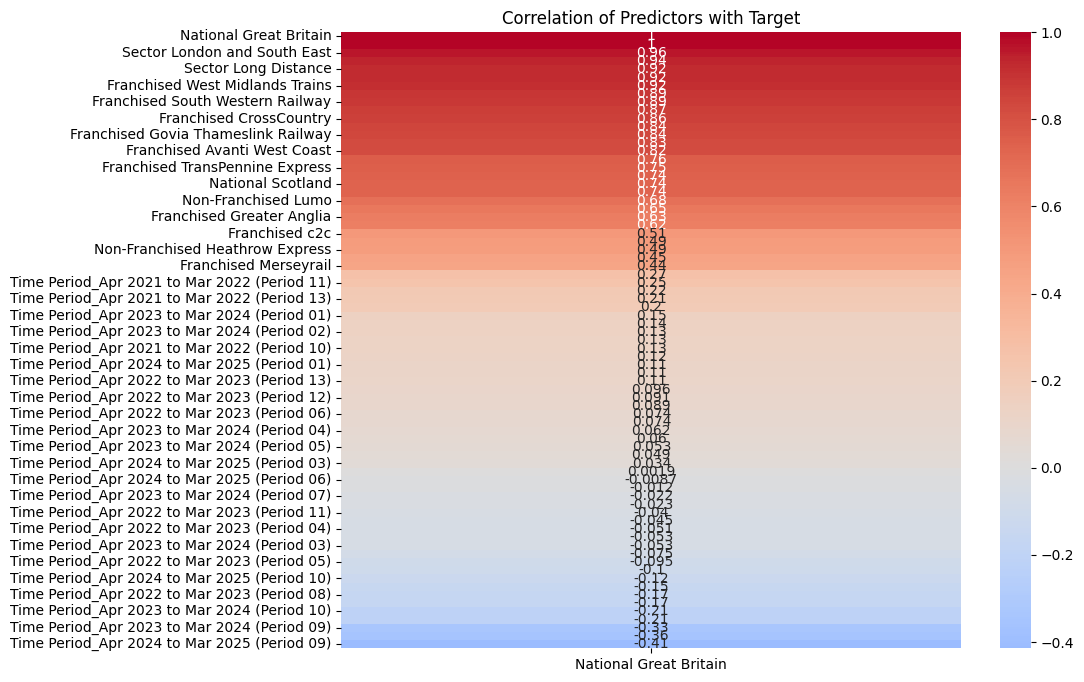

In [58]:
# 1. Correlation Heatmap between predictors and target
plt.figure(figsize=(10, 8))
corr_matrix = pd.concat([X_const.drop(columns='const'), y], axis=1).corr()
sns.heatmap(corr_matrix[[y.name]].sort_values(by=y.name, ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Predictors with Target')
plt.show()

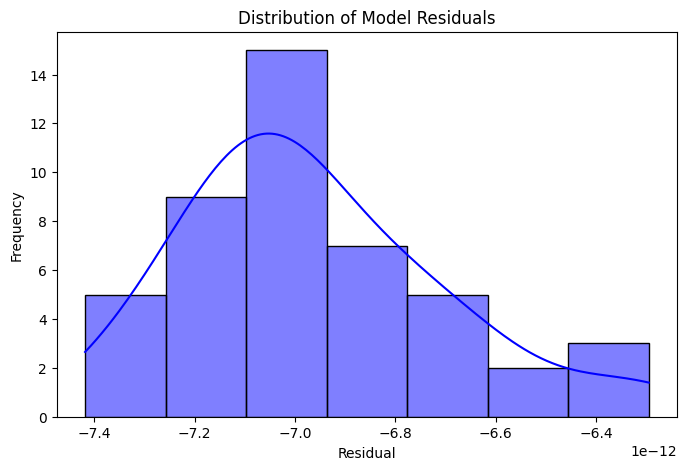

In [61]:
residuals = model.resid

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Model Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

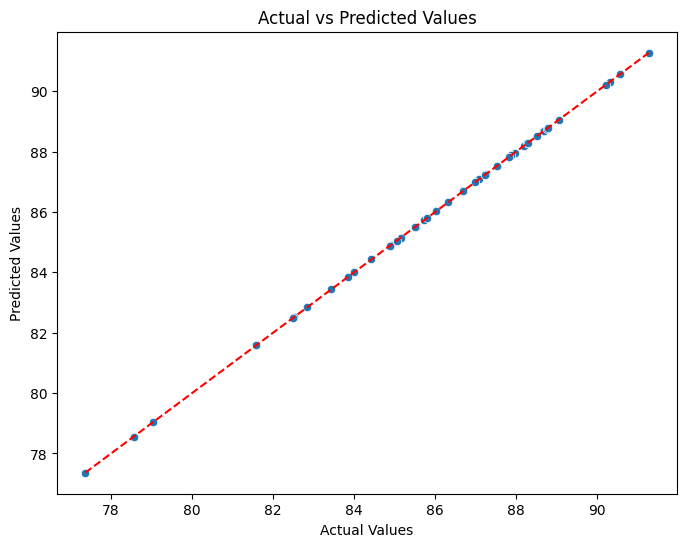

In [62]:
y_pred = model.predict(X_const)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()